iteratoin 0 x -2.13   0
iteratoin 1 x -1.1   0
iteratoin 2 x 2.25   0
iteratoin 3 x 3.99   1
iteratoin 4 x 2.01   1
iteratoin 5 x 1.64   0
iteratoin 6 x -2.18   0
iteratoin 7 x -3.6   0
iteratoin 8 x 1.71   0
iteratoin 9 x -2.56   0
iteratoin 10 x 0.67   0
iteratoin 11 x 1.03   0
iteratoin 12 x 3.46   1
iteratoin 13 x 1.93   1
iteratoin 14 x -3.05   0
iteratoin 15 x -2.3   0
iteratoin 16 x 3.22   1
iteratoin 17 x -2.66   0
iteratoin 18 x 2.81   1
iteratoin 19 x 2.86   1
iteratoin 20 x -2.5   0
iteratoin 21 x -1.19   0
iteratoin 22 x 0.76   0
iteratoin 23 x -3.62   0
iteratoin 24 x 0.72   0
iteratoin 25 x 0.33   0
iteratoin 26 x 0.0   0
iteratoin 27 x 2.02   0
iteratoin 28 x 1.7   0
iteratoin 29 x 2.1   1


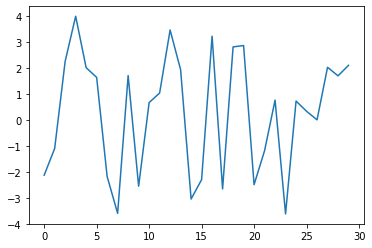

sum1 0.0 sum2 0.0
iteration 0 error 20.684693756733893
iteration 10 error 12.364357685871788
iteration 20 error 10.547654274204179
iteration 30 error 9.573315785454078
iteration 40 error 8.949791771953711
iteration 50 error 8.505863550017146
iteration 60 error 8.167671769338707
iteration 70 error 7.897998590916826
iteration 80 error 7.675868895505381
iteration 90 error 7.488440879657629


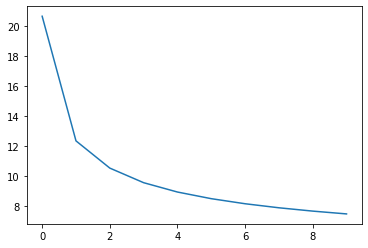

final result w1: 1.2546393935427531   w0: -2.4398640549783948


In [24]:
#HW5
#1
import random
import math
import numpy as np
import matplotlib.pyplot as plt

w1_set = 1.2
w0_set = 0
outcome = 0
w1 = 0.01
w0 = 0.01
eta = 0.01
x_record = []
r_record = []
sum_EN = []

def Y(x):
  if x < 1:
    return 0 
  if x>=1 and x<3:
    return 0.5 * (x - 1)
  if x >= 3:
    return 1

def sigmod(x,w1,w0):
  return 1/(1 + math.exp(-w1*x-w0))

for iteration in range(30):
  x = random.uniform(-4,4)
  zeta = random.uniform(0,1)
  y = Y(x)
  if zeta <= y:
    outcome = 1
    x_record.append(float(x))
    r_record.append(int(outcome))
    print("iteratoin", iteration, 'x', round(x,2),' ',outcome)

  else:
    outcome = 0
    x_record.append(float(x))
    r_record.append(int(outcome))
    print("iteratoin", iteration, 'x', round(x,2),' ',outcome)
plt.plot(x_record)
plt.show()

epoch = 100
sum1 = 0.0
sum2 = 0.0

sum_en = 0.0
print('sum1',sum1,'sum2',sum2)

for iteration2 in range(epoch):
  sum1 = 0.0
  sum2 = 0.0
  sum_en = 0.0
  for i in range(30):
    y = sigmod(x_record[i],w1,w0)
    sum1 = sum1 + (r_record[i] - y) * x_record[i]
    sum2 = sum2 + (r_record[i] - y)
    #compute cross entropy

    sum_en = sum_en - (r_record[i] * math.log(y) + (1 - r_record[i]) * math.log(1 - y))
    
  w1=w1+eta*sum1
  w0=w0+eta*sum2
  if iteration2 % 10 == 0:
    sum_EN.append(float(sum_en))
    print('iteration', iteration2, 'error', sum_en)
plt.plot(sum_EN)
plt.show()
print('final result',"w1:",w1,' ',"w0:",w0)


In [36]:
#HW5
#2
import random
import math
import numpy as np


x1_record = []
x2_record = []
error2_record = []
x1 = 0.0
x2 = 0.0
y1 = 0.0
y2 = 0.0
count1_error = 0
count2_error = 0
#decision boundary

for i in range(1000):
  x1 = random.gauss(0,1)  # mean(0,0) sigma=1
  x2 = random.gauss(0,1)

  if (x1 + 1.5)**2 +(x2 + 2)**2 > 2.91**2:
    count1_error += 1
  else: pass
ce1_percent = count1_error/1000*100
print('error rate 1 in ', round(ce1_percent,2),"%")
for experiment in range(10):
  for i in range (1000):
    y1 = 3.0 + random.gauss(0,3)  # mean(3,4) sigma=3
    y2 = 4.0 + random.gauss(0,3)

    if (y1 + 1.5)**2 + (y2 + 2)**2 < 2.91**2:
      count2_error += 1
    else: pass
  ce2_percent = count2_error/1000*100
  error2_record.append(ce2_percent)

mean = np.mean(error2_record)
std = np.std(error2_record)
print('error rate 2')
print('mean = ',round(mean,2),'%','std = ',round(std,2),"%")

error rate 1 in  40.4 %
error rate 2
mean =  16.31 % std =  8.83 %
